In [36]:
# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "last"

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
pd.set_option('float_format', lambda x: '%.2f' % x)

#显示中文
plt.rcParams['font.sans-serif']='simhei'
plt.rcParams['axes.unicode_minus']=False

# 宏观市场-竞争分析

## 宏观市场潜力分析

In [37]:
wxy=pd.read_excel(r"E:\课件目录\拜耳电商案例课件资料\电商案例数据\驱虫剂市场\蚊香液市场近三年交易额.xlsx")
tz=pd.read_excel(r"E:\课件目录\拜耳电商案例课件资料\电商案例数据\驱虫剂市场\电蚊香套装市场近三年交易额.xlsx")
fmfz=pd.read_excel(r"E:\课件目录\拜耳电商案例课件资料\电商案例数据\驱虫剂市场\防霉防蛀片市场近三年交易额.xlsx")
ms=pd.read_excel(r"E:\课件目录\拜耳电商案例课件资料\电商案例数据\驱虫剂市场\灭鼠杀虫剂市场近三年交易额.xlsx")
wx=pd.read_excel(r"E:\课件目录\拜耳电商案例课件资料\电商案例数据\驱虫剂市场\盘香灭蟑香蚊香盘市场近三年交易额.xlsx")
jrq=pd.read_excel(r"E:\课件目录\拜耳电商案例课件资料\电商案例数据\驱虫剂市场\蚊香加热器市场近三年交易额.xlsx")
wxp=pd.read_excel(r"E:\课件目录\拜耳电商案例课件资料\电商案例数据\驱虫剂市场\蚊香片市场近三年交易额.xlsx")

In [38]:
d=pd.merge(wxy,tz,on="时间",how="inner") 

for i in [fmfz,ms,wx,jrq,wxp]:        # 用循环语句将多个表依次连接
    d=pd.merge(d,i,on="时间",how="inner")

d.head()

d.columns=["时间","蚊香液","电蚊香套装","防霉防蛀片","灭鼠杀虫剂","蚊香","蚊香加热器","蚊香片"]

d.head()

,时间,蚊香液,电蚊香套装,防霉防蛀片,灭鼠杀虫剂,蚊香,蚊香加热器,蚊香片
0,2018-10-01,7814546.15,106531.29,8541153.59,113654778.06,4171283.35,315639.48,1032414.29
1,2018-09-01,10654973.47,105666.63,8825870.43,144026060.60,6784500.17,457366.41,1566651.88
2,2018-08-01,17835577.80,201467.03,6320153.44,154042579.93,10709683.41,746513.13,2617149.00
3,2018-07-01,38877917.83,438635.29,6302595.06,148003236.35,16589184.89,1871757.00,6209040.06
4,2018-06-01,76499091.86,953749.78,7047206.98,135943823.74,23526385.73,3641025.92,12484919.63


In [39]:
d.head()

,时间,蚊香液,电蚊香套装,防霉防蛀片,灭鼠杀虫剂,蚊香,蚊香加热器,蚊香片
0,2018-10-01,7814546.15,106531.29,8541153.59,113654778.06,4171283.35,315639.48,1032414.29
1,2018-09-01,10654973.47,105666.63,8825870.43,144026060.60,6784500.17,457366.41,1566651.88
2,2018-08-01,17835577.80,201467.03,6320153.44,154042579.93,10709683.41,746513.13,2617149.00
3,2018-07-01,38877917.83,438635.29,6302595.06,148003236.35,16589184.89,1871757.00,6209040.06
4,2018-06-01,76499091.86,953749.78,7047206.98,135943823.74,23526385.73,3641025.92,12484919.63


## 一级市场的容量分析

把datetime格式的字段设置为该表的索引，可以方便后续对表进行按时间维度分析：

In [40]:
d=d.set_index("时间")

In [41]:
d.head()

,蚊香液,电蚊香套装,防霉防蛀片,灭鼠杀虫剂,蚊香,蚊香加热器,蚊香片
时间,,,,,,,
2018-10-01,7814546.15,106531.29,8541153.59,113654778.06,4171283.35,315639.48,1032414.29
2018-09-01,10654973.47,105666.63,8825870.43,144026060.60,6784500.17,457366.41,1566651.88
2018-08-01,17835577.80,201467.03,6320153.44,154042579.93,10709683.41,746513.13,2617149.00
2018-07-01,38877917.83,438635.29,6302595.06,148003236.35,16589184.89,1871757.00,6209040.06
2018-06-01,76499091.86,953749.78,7047206.98,135943823.74,23526385.73,3641025.92,12484919.63


In [42]:
d["一级市场销售额"]=d.sum(axis=1)
d.head()

,蚊香液,电蚊香套装,防霉防蛀片,灭鼠杀虫剂,蚊香,蚊香加热器,蚊香片,一级市场销售额
时间,,,,,,,,
2018-10-01,7814546.15,106531.29,8541153.59,113654778.06,4171283.35,315639.48,1032414.29,135636346.21
2018-09-01,10654973.47,105666.63,8825870.43,144026060.60,6784500.17,457366.41,1566651.88,172421089.59
2018-08-01,17835577.80,201467.03,6320153.44,154042579.93,10709683.41,746513.13,2617149.00,192473123.74
2018-07-01,38877917.83,438635.29,6302595.06,148003236.35,16589184.89,1871757.00,6209040.06,218292366.48
2018-06-01,76499091.86,953749.78,7047206.98,135943823.74,23526385.73,3641025.92,12484919.63,260096203.64


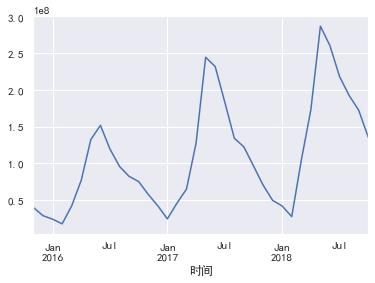

In [43]:
d.一级市场销售额.plot()

- 整个一级市场在近两年来，市场总体容量是增加的
- 每年夏天是这一年一级市场交易额的高峰期，有明显的季节性波动
- 整个一级市场的容量增速有所放缓

通过折线图发现，如果作年度市场容量分析，缺少了2018年11月和12月的数据，可以用线性回归做简单的填补：

预测2018年11月的销售额：
- 抽取2015年到2017年11月的数据
- 利用抽取的数据，对每个二级市场单独建立线性回归模型，得到每个二级市场的2018年11月的销售额预测结果

In [44]:
d.head()

,蚊香液,电蚊香套装,防霉防蛀片,灭鼠杀虫剂,蚊香,蚊香加热器,蚊香片,一级市场销售额
时间,,,,,,,,
2018-10-01,7814546.15,106531.29,8541153.59,113654778.06,4171283.35,315639.48,1032414.29,135636346.21
2018-09-01,10654973.47,105666.63,8825870.43,144026060.60,6784500.17,457366.41,1566651.88,172421089.59
2018-08-01,17835577.80,201467.03,6320153.44,154042579.93,10709683.41,746513.13,2617149.00,192473123.74
2018-07-01,38877917.83,438635.29,6302595.06,148003236.35,16589184.89,1871757.00,6209040.06,218292366.48
2018-06-01,76499091.86,953749.78,7047206.98,135943823.74,23526385.73,3641025.92,12484919.63,260096203.64


In [45]:
d_11=pd.concat([d["2015-11"],d["2016-11"],d["2017-11"]],axis=0)
d_11

,蚊香液,电蚊香套装,防霉防蛀片,灭鼠杀虫剂,蚊香,蚊香加热器,蚊香片,一级市场销售额
时间,,,,,,,,
2015-11-01,1579795.72,185094.22,3364112.14,33038726.31,1197791.27,86889.91,325744.43,39778154.00
2016-11-01,2758827.44,106291.23,4975519.21,47806248.76,1473418.20,82835.82,512990.23,57716130.89
2017-11-01,4257593.87,94993.76,5447184.43,58382172.96,1581530.20,168141.79,617094.94,70548711.95


对上表每个二级市场在2018-11月的销售额做预测：

In [46]:
from sklearn import linear_model    # 想清楚x和y数据集分别是什么

y_11=[]      # 该空列表用来存储预测结果

x_train=np.array([2015,2016,2017]).reshape(-1,1)      # 记得转数组

for i in d.columns:    # 每次抽取一列的字段名
    y_train=d_11[i].values   # 记得转数组
    lr=linear_model.LinearRegression().fit(x_train,y_train)   # 建立模型，训练模型
    y_pre=lr.predict(np.array([[2018]]))   
    y_11.append(y_pre[0])  # y_pre是数组，要把预测值从数组中抽取

In [47]:
y_11

[5543203.826666832,
 38692.609999999404,
 6678677.549999952,
 71752495.99333572,
 1801318.8199999928,
 193874.38666665554,
 776627.0433334112,
 86784890.22999954]

要想把上面的y_11作为2018-11的销售预测结果合并到d_11表中去，就要先生成时间格式的数值，因为d_11索引就是datetime类型。

In [49]:
ss=pd.Series(y_11,
          index=d_11.columns,
          name=pd.to_datetime("2018-11-01"))

ss 

蚊香液        5543203.83
电蚊香套装        38692.61
防霉防蛀片      6678677.55
灭鼠杀虫剂     71752495.99
蚊香         1801318.82
蚊香加热器       193874.39
蚊香片         776627.04
一级市场销售额   86784890.23
Name: 2018-11-01 00:00:00, dtype: float64

把上面的Series返回d_11的最后一行：

In [50]:
d_11=d_11.append(ss)

d_11

,蚊香液,电蚊香套装,防霉防蛀片,灭鼠杀虫剂,蚊香,蚊香加热器,蚊香片,一级市场销售额
时间,,,,,,,,
2015-11-01,1579795.72,185094.22,3364112.14,33038726.31,1197791.27,86889.91,325744.43,39778154.00
2016-11-01,2758827.44,106291.23,4975519.21,47806248.76,1473418.20,82835.82,512990.23,57716130.89
2017-11-01,4257593.87,94993.76,5447184.43,58382172.96,1581530.20,168141.79,617094.94,70548711.95
2018-11-01,5543203.83,38692.61,6678677.55,71752495.99,1801318.82,193874.39,776627.04,86784890.23


同理，对二级市场12月的数据进行相同方式预测：

In [51]:
d_12=pd.concat([d["2015-12"],d["2016-12"],d["2017-12"]],axis=0)
d_12

# 
from sklearn import linear_model    # 想清楚x和y数据集分别是什么

y_12=[]      # 该空列表用来存储预测结果

x_train=np.array([2015,2016,2017]).reshape(-1,1)      # 记得转数组

for i in d.columns:    # 每次抽取一列的字段名
    y_train=d_12[i].values   # 记得转数组
    lr=linear_model.LinearRegression().fit(x_train,y_train)   # 建立模型，训练模型
    y_pre=lr.predict(np.array([[2018]]))   
    y_12.append(y_pre[0])  # y_pre是数组，要把预测值从数组中抽取


#
ss=pd.Series(y_12,
          index=d_12.columns,
          name=pd.to_datetime("2018-12-01"))


d_12=d_12.append(ss)

d_12

,蚊香液,电蚊香套装,防霉防蛀片,灭鼠杀虫剂,蚊香,蚊香加热器,蚊香片,一级市场销售额
时间,,,,,,,,
2015-12-01,583284.49,110068.83,2333602.08,24727556.28,818479.56,34076.91,134890.48,28741958.63
2016-12-01,1558633.63,84350.57,3504367.98,35466680.56,1234900.05,52118.96,293737.20,42194788.95
2017-12-01,2213102.83,71600.17,3259747.23,42922831.01,796930.46,69145.59,314120.38,49647477.67
2018-12-01,3081491.99,50204.53,3958717.58,52567630.68,928554.26,86849.17,426812.59,61100260.79


把d,d_11,d_12纵向合并到一起，然后去重、排序：

In [58]:
data_all=pd.concat([d,d_11,d_12],axis=0).drop_duplicates().sort_index(ascending=False).iloc[:-2,:]
data_all.head()

,蚊香液,电蚊香套装,防霉防蛀片,灭鼠杀虫剂,蚊香,蚊香加热器,蚊香片,一级市场销售额
时间,,,,,,,,
2018-12-01,3081491.99,50204.53,3958717.58,52567630.68,928554.26,86849.17,426812.59,61100260.79
2018-11-01,5543203.83,38692.61,6678677.55,71752495.99,1801318.82,193874.39,776627.04,86784890.23
2018-10-01,7814546.15,106531.29,8541153.59,113654778.06,4171283.35,315639.48,1032414.29,135636346.21
2018-09-01,10654973.47,105666.63,8825870.43,144026060.60,6784500.17,457366.41,1566651.88,172421089.59
2018-08-01,17835577.80,201467.03,6320153.44,154042579.93,10709683.41,746513.13,2617149.00,192473123.74


接下来作年度市场容量分析：
- 只要DataFrame的索引是datetime数据类型的，该DataFrame就可以调用resample进行重采样
- 可以把df.resample()方法看作是专门给时间用的"df.groupby()"
- df.resample()方法与df.groupby()生成的对象的数据结构是一样

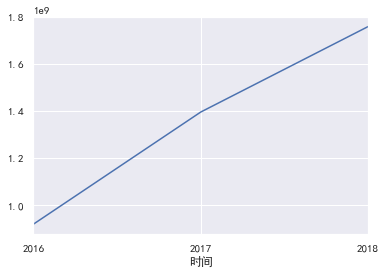

In [62]:
data_all.resample("Y")["一级市场销售额"].sum().plot()

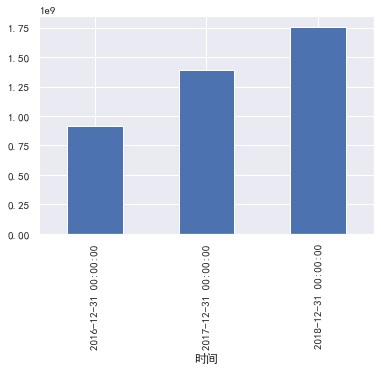

In [64]:
data_all.resample("Y")["一级市场销售额"].sum().plot(kind="bar")

与2016-2017年销售额增速相比，2017-2018年有所下滑。

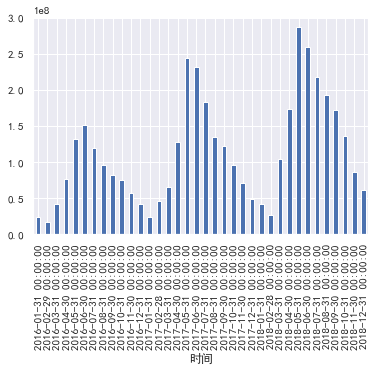

In [65]:
data_all.resample("M")["一级市场销售额"].sum().plot(kind="bar")

## 二级市场容量分析

In [66]:
data_all.head()

,蚊香液,电蚊香套装,防霉防蛀片,灭鼠杀虫剂,蚊香,蚊香加热器,蚊香片,一级市场销售额
时间,,,,,,,,
2018-12-01,3081491.99,50204.53,3958717.58,52567630.68,928554.26,86849.17,426812.59,61100260.79
2018-11-01,5543203.83,38692.61,6678677.55,71752495.99,1801318.82,193874.39,776627.04,86784890.23
2018-10-01,7814546.15,106531.29,8541153.59,113654778.06,4171283.35,315639.48,1032414.29,135636346.21
2018-09-01,10654973.47,105666.63,8825870.43,144026060.60,6784500.17,457366.41,1566651.88,172421089.59
2018-08-01,17835577.80,201467.03,6320153.44,154042579.93,10709683.41,746513.13,2617149.00,192473123.74


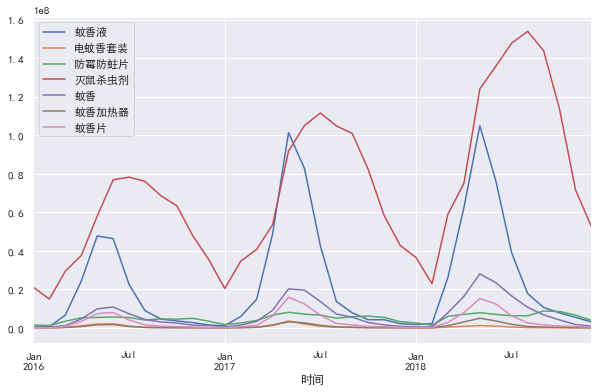

In [67]:
data_all.iloc[:,:-1].plot(figsize=(10,6))

- 虽然一级市场销售额在2017-2018年增速放缓
- 但是拜耳主营业务产品所处的二级市场（灭鼠杀虫剂）增速放缓不明显，且容量出于扩展状态

## 二级市场占比分析

## 二级市场增量分析